
### Load up deposit locations using geopandas

We can read the geojson directly

In [2]:
from pathlib import Path
import geopandas

data = Path('../data/deposit_locations.geo.json')
deposits = geopandas.read_file(data)
deposits.head()

,age,comment,commodities_string,id,latitude,longitude,name,geometry
0,Late Ordovician,Late Ordovician-Silurian,Au;Cu,333286,-36.115388,147.091253,Bethanga,POINT (147.0912532 -36.11538783)
1,Late Palaeozoic,nan,Ag;Zn;Pb,333287,-18.710841,125.968020,Cadjebut,POINT (125.9680199 -18.71084053)
2,Tertiary,nan,U,333288,-31.740950,140.662364,Honeymoon,POINT (140.6623645 -31.74095042)
3,Precambrian,nan,Fe,333289,-22.635456,118.138599,Marandoo,POINT (118.1385991 -22.63545578)
4,Neoproterozoic,coincides with NNW trending transcontinental g...,Ag;Cu;Co,333290,-31.447091,137.149981,Mount Gunson,POINT (137.1499808 -31.44709128)


Show deposit locations

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

Load up a coarse resolution boundary of Australia

In [ ]:
path = geopandas.datasets.get_path('naturalearth_lowres')
earth = geopandas.read_file(path)
australia = earth[earth['name'] == 'Australia']
# australia.iloc[0].geometry

Plot the locations

Text(0.5, 1.0, 'Deposit locations in target dataset')

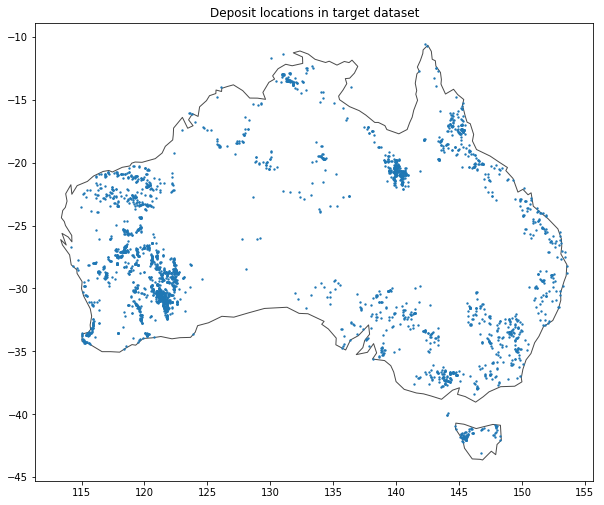

In [5]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(10, 10)
australia.plot(edgecolor='black', facecolor='white', alpha=0.7, ax=ax)
deposits.plot(markersize=2, alpha=0.9, ax=ax)
ax.set_title('Deposit locations in target dataset')

Select locations inside a bounding box (around Kalgoorlie in this case)

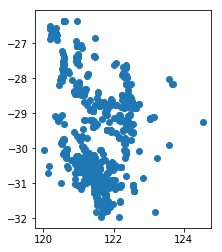

In [6]:
from shapely import geometry

bbox = geometry.box(120, -26, 125, -32)

deposits[deposits.within(bbox)].plot()

### Loading up geology data

Download the data to the local folder

In [7]:
import requests
import shutil

def download_file(url):
    local_filename = url.split('/')[-1]
    r = requests.get(url, stream=True)
    with open(local_filename, 'wb') as f:
        shutil.copyfileobj(r.raw, f)

    return local_filename

output = Path('74619_1M_shapefiles.zip')
if not output.exists():
    download_file('https://d28rz98at9flks.cloudfront.net/74619/74619_1M_shapefiles.zip')

Read some of the shapeifiles

In [8]:
import zipfile

archive = zipfile.ZipFile('74619_1M_shapefiles.zip', 'r')
shapefiles = [f for f in archive.namelist() if f.endswith('shp')]
shapefiles

['shapefiles/Contacts1M.shp',
 'shapefiles/Framework1M.shp',
 'shapefiles/GeologicUnitLines1M.shp',
 'shapefiles/GeologicUnitPolygons1M.shp',
 'shapefiles/MiscLines1M.shp',
 'shapefiles/ShearDisplacementLines1M.shp']

In [9]:
# Extract files from the zip
layer = 'shapefiles/GeologicUnitPolygons1M'
for fname in archive.namelist():
    if fname.startswith(layer) and not Path(fname).exists():
        archive.extract(fname)

# Load up shapefile
units = geopandas.read_file('shapefiles/GeologicUnitPolygons1M.shp')
units.head()

,GEODB_OID,OBJECTID,MAPSYMBOL,PLOTSYMBOL,STRATNO,NAME,DESCR,TYPENAME,TYPE_URI,GEOLHIST,...,FRAME,RESSCALE,CAPTDATE,MODDATE,PLOTRANK,FEATUREID,GEOLUNITID,SHAPE_LENG,SHAPE_AREA,geometry
0,None,1,Nssp,Ns,26904,Spearhole Formation,Cross bedded poorly sorted granule and pebble ...,lithostratigraphic unit,http://resource.geosciml.org/classifier/cgi/ge...,Cryogenian,...,land surface,1000000,2008-11-27,2008-11-27,1,GA_GUP1M_0058707,GA.GeologicUnit.SurfaceGeology1M.26904,None,None,"POLYGON ((120.467698055 -24.37326333299995, 12..."
1,None,2,Qrc,Qrc,38491,colluvium 38491,"Colluvium and/or residual deposits, sheetwash,...",lithostratigraphic unit,http://resource.geosciml.org/classifier/cgi/ge...,Quaternary,...,land surface,1000000,2008-11-27,2008-11-27,1,GA_GUP1M_0058805,GA.GeologicUnit.SurfaceGeology1M.38491,None,None,POLYGON ((115.2658080560001 -23.82720666699993...
2,None,3,Qa,Qa,38485,alluvium 38485,"Channel and flood plain alluvium; gravel, sand...",lithostratigraphic unit,http://resource.geosciml.org/classifier/cgi/ge...,Holocene,...,land surface,1000000,2005-09-19,2005-09-19,1,GA_GUP1M_0058708,GA.GeologicUnit.SurfaceGeology1M.38485,None,None,"POLYGON ((143.47412308 -14.09270349999997, 143..."
3,None,4,Lshe,Ls,34024,Mamadawerre Sandstone,"White, thickly bedded, commonly tabular or tro...",lithostratigraphic unit,http://resource.geosciml.org/classifier/cgi/ge...,Statherian to Paleoproterozoic,...,land surface,1000000,2007-07-05,2007-07-05,1,GA_GUP1M_0058709,GA.GeologicUnit.SurfaceGeology1M.34024,None,None,"POLYGON ((133.003807914 -12.78770367799996, 13..."
4,None,5,Qa,Qa,38485,alluvium 38485,"Channel and flood plain alluvium; gravel, sand...",lithostratigraphic unit,http://resource.geosciml.org/classifier/cgi/ge...,Holocene,...,land surface,1000000,2008-11-27,2008-11-27,1,GA_GUP1M_0058806,GA.GeologicUnit.SurfaceGeology1M.38485,None,None,"POLYGON ((120.967810888 -32.69829297099994, 12..."


And then we can extract a segmet in a small bounding box similar to the raster layers

In [12]:
from explore_australia.reprojection import reproject

def clip_out(stamp, to_crs, crs='epsg:4326'):
    "Clip out the area given by the stamp polygon"
    # We first subset to the set of units that intersects with the bounding box, then generate the intersection
    stamp_reproj = reproject(stamp, crs, units.crs)
    subset = units[units.intersects(stamp_reproj)]
    clipped = subset.copy()
    clipped = clipped.intersection(stamp_reproj).to_crs(to_crs)
    return clipped

And we can go ahead and reproject

In [27]:
from shapely.geometry import Point

from explore_australia.utilities import omerc_projection
from explore_australia.geometry import make_stamp

# Make a rotated box to pull data from
centre = Point(122.169999, -32.42)
angle = 45
stamp = make_stamp(centre, angle)

# Clip the data and reproject to a locally aligned grid in m
projection = omerc_projection(centre, angle)
clipped = clip_out(stamp, crs='epsg:4326', to_crs=projection)

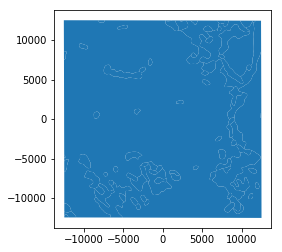

In [28]:
clipped.plot()

Now we can pull out a single unit in the area for masking or some other purpose (distance to contacts maybe?)

In [47]:
# clipped.loc[16288]  # uncomment to render - github doesn't like raw SVG

We can also recover some of the information about the unit from its ID

In [36]:
units.loc[16288]

GEODB_OID                                                  None
OBJECTID                                                  16289
MAPSYMBOL                                                   Qrc
PLOTSYMBOL                                                  Qrc
STRATNO                                                   38491
NAME                                            colluvium 38491
DESCR         Colluvium and/or residual deposits, sheetwash,...
TYPENAME                                lithostratigraphic unit
TYPE_URI      http://resource.geosciml.org/classifier/cgi/ge...
GEOLHIST                                             Quaternary
REPAGE_URI    http://resource.geosciml.org/classifier/ics/is...
YNGAGE_URI    http://resource.geosciml.org/classifier/ics/is...
OLDAGE_URI    http://resource.geosciml.org/classifier/ics/is...
LITHOLOGY                                              regolith
REPLTH_URI    http://resource.geosciml.org/classifier/cgi/li...
MORPHOLOGY                              